# Emergency 911 calls

Data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). Containing the following parameters

* lat: String Variable, Latitude
* lng: String Variable, longitude
* desc: String Variable, description
* zip: String Variable, zip code
* title: String Variable, title
* timeStamp: String Variable, time: YYYY-MM-DD HH:MM:SS
* twp: String Variable, township
* addr: String Variable, address
* e: String Variable, Dummy Variable (always 1)


In [3]:
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv('911.csv')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        583323 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663229 non-null  object 
 7   addr       663522 non-null  object 
 8   e          663522 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 45.6+ MB


In [11]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


## general questions

**Top 5 zipcodes**

In [12]:
df['zip'].value_counts().head(5)

19401.0    45606
19464.0    43910
19403.0    34888
19446.0    32270
19406.0    22464
Name: zip, dtype: int64

**Top 5 township (twp))**

In [13]:
df['twp'].value_counts().head(5)

LOWER MERION    55490
ABINGTON        39947
NORRISTOWN      37633
UPPER MERION    36010
CHELTENHAM      30574
Name: twp, dtype: int64

**How many unique "title" entries are there?**

In [14]:
df['title'].nunique()

148

## define and add a new Feature
define a new column with the reason for the call. Extract the reason out of the title

In [5]:
df['reason']= df['title'].apply(lambda title: title.split(':')[0])

In [16]:
df[df['title']=="EMS: BACK PAINS/INJURY"]['reason']

0         EMS
250       EMS
361       EMS
420       EMS
923       EMS
         ... 
663279    EMS
663287    EMS
663314    EMS
663333    EMS
663382    EMS
Name: reason, Length: 4880, dtype: object

**most common reason for a call?**

In [17]:
df['reason'].value_counts()

EMS        332692
Traffic    230208
Fire       100622
Name: reason, dtype: int64

**Create a Seaborn `countplot` for the reasons.**

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot:xlabel='reason', ylabel='count'>

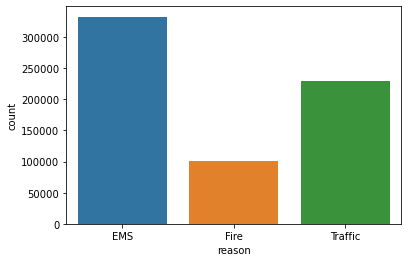

In [18]:
sns.countplot(x='reason', data = df)

**Now we will take a look at the *timestamp***

In [19]:
type(df['timeStamp'].iloc[0])

str

**We need to convert the type String to a more machine friendly variable. With the `pd.to_datetime`([Documentation](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html)), the type can be changed.**

In [20]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

**Now we can take a look at the hour or name of the day.**

In [21]:
time = df['timeStamp'].iloc[0]
time.hour

17

In [22]:
time.day_of_week

3

In [23]:
time.day_name()

'Thursday'

In [11]:
df.iloc[::60000, :]

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
60000,40.124475,-75.338279,WOOD ST & LAND ALY; NORRISTOWN; Station 308A;...,19401.0,EMS: SUBJECT IN PAIN,2016-05-15 23:04:19,NORRISTOWN,WOOD ST & LAND ALY,1,EMS
120000,40.119605,-75.284900,GERMANTOWN PIKE & ATRIUM WAY; PLYMOUTH; Stati...,19462.0,EMS: ABDOMINAL PAINS,2016-10-17 15:50:16,PLYMOUTH,GERMANTOWN PIKE & ATRIUM WAY,1,EMS
180000,40.001685,-75.264210,CHESTNUT AVE & E WYNNEWOOD RD; NARBERTH; 2017-...,19096.0,Fire: BUILDING FIRE,2017-03-21 14:45:04,NARBERTH,CHESTNUT AVE & E WYNNEWOOD RD,1,Fire
240000,40.311981,-75.311510,SCHOOL LN & MONTGOMERY AVE; SOUDERTON; 2017-08...,18964.0,Fire: FIRE ALARM,2017-08-25 11:14:41,SOUDERTON,SCHOOL LN & MONTGOMERY AVE,1,Fire
300000,40.184798,-75.286879,TWIN SILO DR & MORRIS RD; WHITPAIN; Station 3...,19422.0,EMS: UNCONSCIOUS SUBJECT,2018-01-21 17:24:35,WHITPAIN,TWIN SILO DR & MORRIS RD,1,EMS
360000,40.117585,-75.338136,OAK ST & HIGH ALY; NORRISTOWN; Station 308A; ...,19401.0,EMS: ASSAULT VICTIM,2018-06-16 23:04:45,NORRISTOWN,OAK ST & HIGH ALY,1,EMS
420000,40.136654,-75.125693,HIGH AVE & RUBICAM AVE; ABINGTON; Station 381...,19090.0,EMS: SEIZURES,2018-11-09 18:55:27,ABINGTON,HIGH AVE & RUBICAM AVE,1,EMS
480000,40.121497,-75.339905,RR OVERPASS; NORRISTOWN; Station 313; 2019-04...,NaN,EMS: MEDICAL ALERT ALARM,2019-04-04 16:31:42,NORRISTOWN,RR OVERPASS,1,EMS
540000,40.295935,-75.454344,EXTENSION PENNSYLVANIA TPKE & RIDGE RD OVERPAS...,19438.0,Fire: VEHICLE ACCIDENT,2019-08-29 14:54:12,SALFORD,EXTENSION PENNSYLVANIA TPKE & RIDGE RD OVERPASS,1,Fire


define new features

In [24]:
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['Day of Week'] = df['timeStamp'].apply(lambda time: time.day_of_week)

map the number of the day to the abbrevations for the day (This should not be neccessary, since we could use the time function `time.day_name()` )

In [25]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [26]:
df['Day of Week'] = df['Day of Week'].map(dmap)

In [27]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,Thu


**The next Seaborn `countplot` shows the day of the week and the number of calls for each reason.**

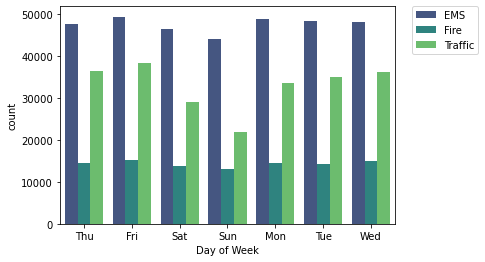

In [28]:
sns.countplot(data=df, x='Day of Week', hue='reason',palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

**Now for every month**

In [29]:
df['Month'].value_counts(sort=False)

12    57692
1     62336
2     55427
3     60027
4     53671
5     57509
6     60034
7     59832
8     48359
9     47213
10    51240
11    50182
Name: Month, dtype: int64

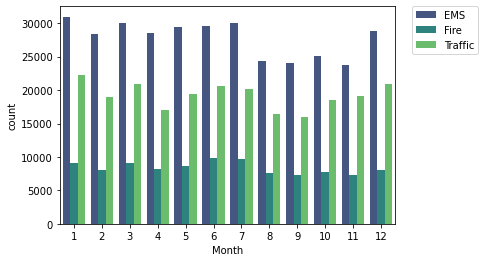

In [30]:
sns.countplot(data=df, x='Month', hue='reason',palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

create a object which uses groupby to rearange the dataframe by Month

In [37]:
#create a new variable to rearrange the data frame
byMonth = df.groupby('Month').count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,62336,62336,62336,55294,62336,62336,62312,62336,62336,62336,62336,62336
2,55427,55427,55427,48922,55427,55427,55405,55427,55427,55427,55427,55427
3,60027,60027,60027,53252,60027,60027,60001,60027,60027,60027,60027,60027
4,53671,53671,53671,47349,53671,53671,53655,53671,53671,53671,53671,53671
5,57509,57509,57509,50354,57509,57509,57474,57509,57509,57509,57509,57509


In [38]:
byMonth

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,62336,62336,62336,55294,62336,62336,62312,62336,62336,62336,62336,62336
2,55427,55427,55427,48922,55427,55427,55405,55427,55427,55427,55427,55427
3,60027,60027,60027,53252,60027,60027,60001,60027,60027,60027,60027,60027
4,53671,53671,53671,47349,53671,53671,53655,53671,53671,53671,53671,53671
5,57509,57509,57509,50354,57509,57509,57474,57509,57509,57509,57509,57509
6,60034,60034,60034,52593,60034,60034,60005,60034,60034,60034,60034,60034
7,59832,59832,59832,52507,59832,59832,59802,59832,59832,59832,59832,59832
8,48359,48359,48359,42311,48359,48359,48335,48359,48359,48359,48359,48359
9,47213,47213,47213,41289,47213,47213,47196,47213,47213,47213,47213,47213


**Create a simple diagram to show the counts (number of calls) per month.**

<AxesSubplot:xlabel='Month'>

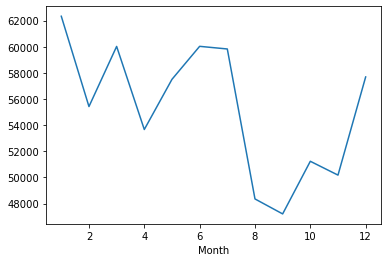

In [32]:
# take any variable here 'Day of week'
byMonth['Day of Week'].plot()

Now with a `lmplot()`

In [40]:
byMonth.reset_index()

,Month,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,Hour,Day of Week
0,1,62336,62336,62336,55294,62336,62336,62312,62336,62336,62336,62336,62336
1,2,55427,55427,55427,48922,55427,55427,55405,55427,55427,55427,55427,55427
2,3,60027,60027,60027,53252,60027,60027,60001,60027,60027,60027,60027,60027
3,4,53671,53671,53671,47349,53671,53671,53655,53671,53671,53671,53671,53671
4,5,57509,57509,57509,50354,57509,57509,57474,57509,57509,57509,57509,57509
5,6,60034,60034,60034,52593,60034,60034,60005,60034,60034,60034,60034,60034
6,7,59832,59832,59832,52507,59832,59832,59802,59832,59832,59832,59832,59832
7,8,48359,48359,48359,42311,48359,48359,48335,48359,48359,48359,48359,48359
8,9,47213,47213,47213,41289,47213,47213,47196,47213,47213,47213,47213,47213
9,10,51240,51240,51240,44582,51240,51240,51220,51240,51240,51240,51240,51240


*NOTE: reset_index() is set to let the index begin with 0 instead of 1*

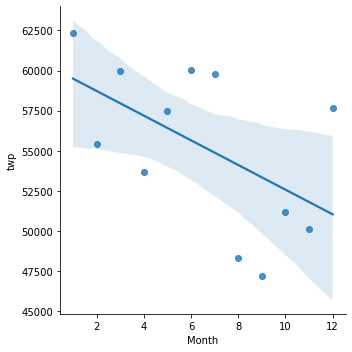

In [39]:
sns.lmplot(x='Month',y='twp', data=byMonth.reset_index())

**Create a new variable with `.date()`.**

In [41]:
df['Date'] = df['timeStamp'].apply(lambda t: t.date())

**group and rearrange with `count()`. Now we get a single diagram with all the calls.**

<AxesSubplot:xlabel='Date'>

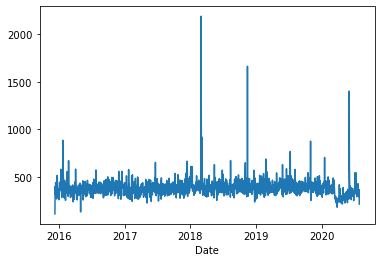

In [42]:
df.groupby('Date').count()['twp'].plot()

**Now a plot for each reason of call.**

Text(0.5, 1.0, 'Traffic')

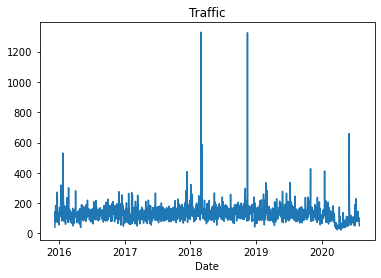

In [45]:
df[df['reason']=='Traffic'].groupby('Date').count()['twp'].plot()
plt.title('Traffic')

Text(0.5, 1.0, 'Fire')

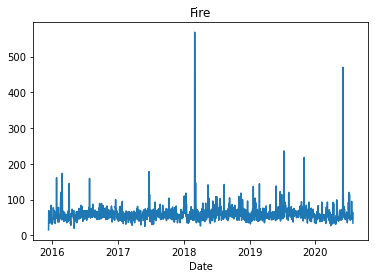

In [46]:
df[df['reason']=='Fire'].groupby('Date').count()['twp'].plot()
plt.title('Fire')

Text(0.5, 1.0, 'EMS')

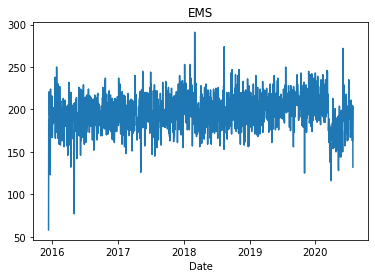

In [47]:
df[df['reason']=='EMS'].groupby('Date').count()['twp'].plot()
plt.title('EMS')

**Now we can continue with heatmaps and Seaborn. To do this, we need to restructure our DataFrame so that the hours become the columns and the "Day of Week" becomes the index. There are many ways to do this. I recommend a combination of `groupby` and the `unstack`([documentation](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html))**

In [49]:
dayHour = df.groupby(by=['Day of Week','Hour']).count()['reason'].unstack()
dayHour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,1983,1635,1449,1296,1339,1639,2670,4143,5018,5288,...,6394,7040,7065,7113,5668,5056,4375,3913,3422,2834
Mon,1894,1571,1368,1272,1336,1844,2675,4430,5504,5724,...,5713,6289,6346,6408,5441,4488,3823,3254,2658,2072
Sat,2447,2059,1883,1592,1451,1580,1880,2489,3457,4315,...,5421,5181,5211,5213,4980,4753,4127,3895,3226,2965
Sun,2424,2135,1946,1614,1471,1488,1726,2408,3001,3728,...,4744,4475,4560,4505,4402,4135,3748,3161,2629,2323
Thu,1731,1408,1426,1236,1293,1775,2816,4432,5297,5412,...,6079,6493,6375,6935,5512,4703,4045,3490,2844,2354


**Create a HeatMap using the new DataFrame.**

<AxesSubplot:xlabel='Hour', ylabel='Day of Week'>

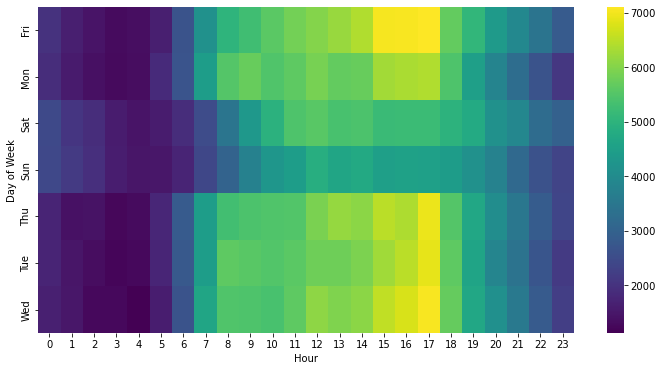

In [51]:
plt.figure(figsize=(12,6))
sns.heatmap(dayHour,cmap='viridis')

***Now take a look at the data depending on the cathegory.***

<AxesSubplot:xlabel='Hour', ylabel='Day of Week'>

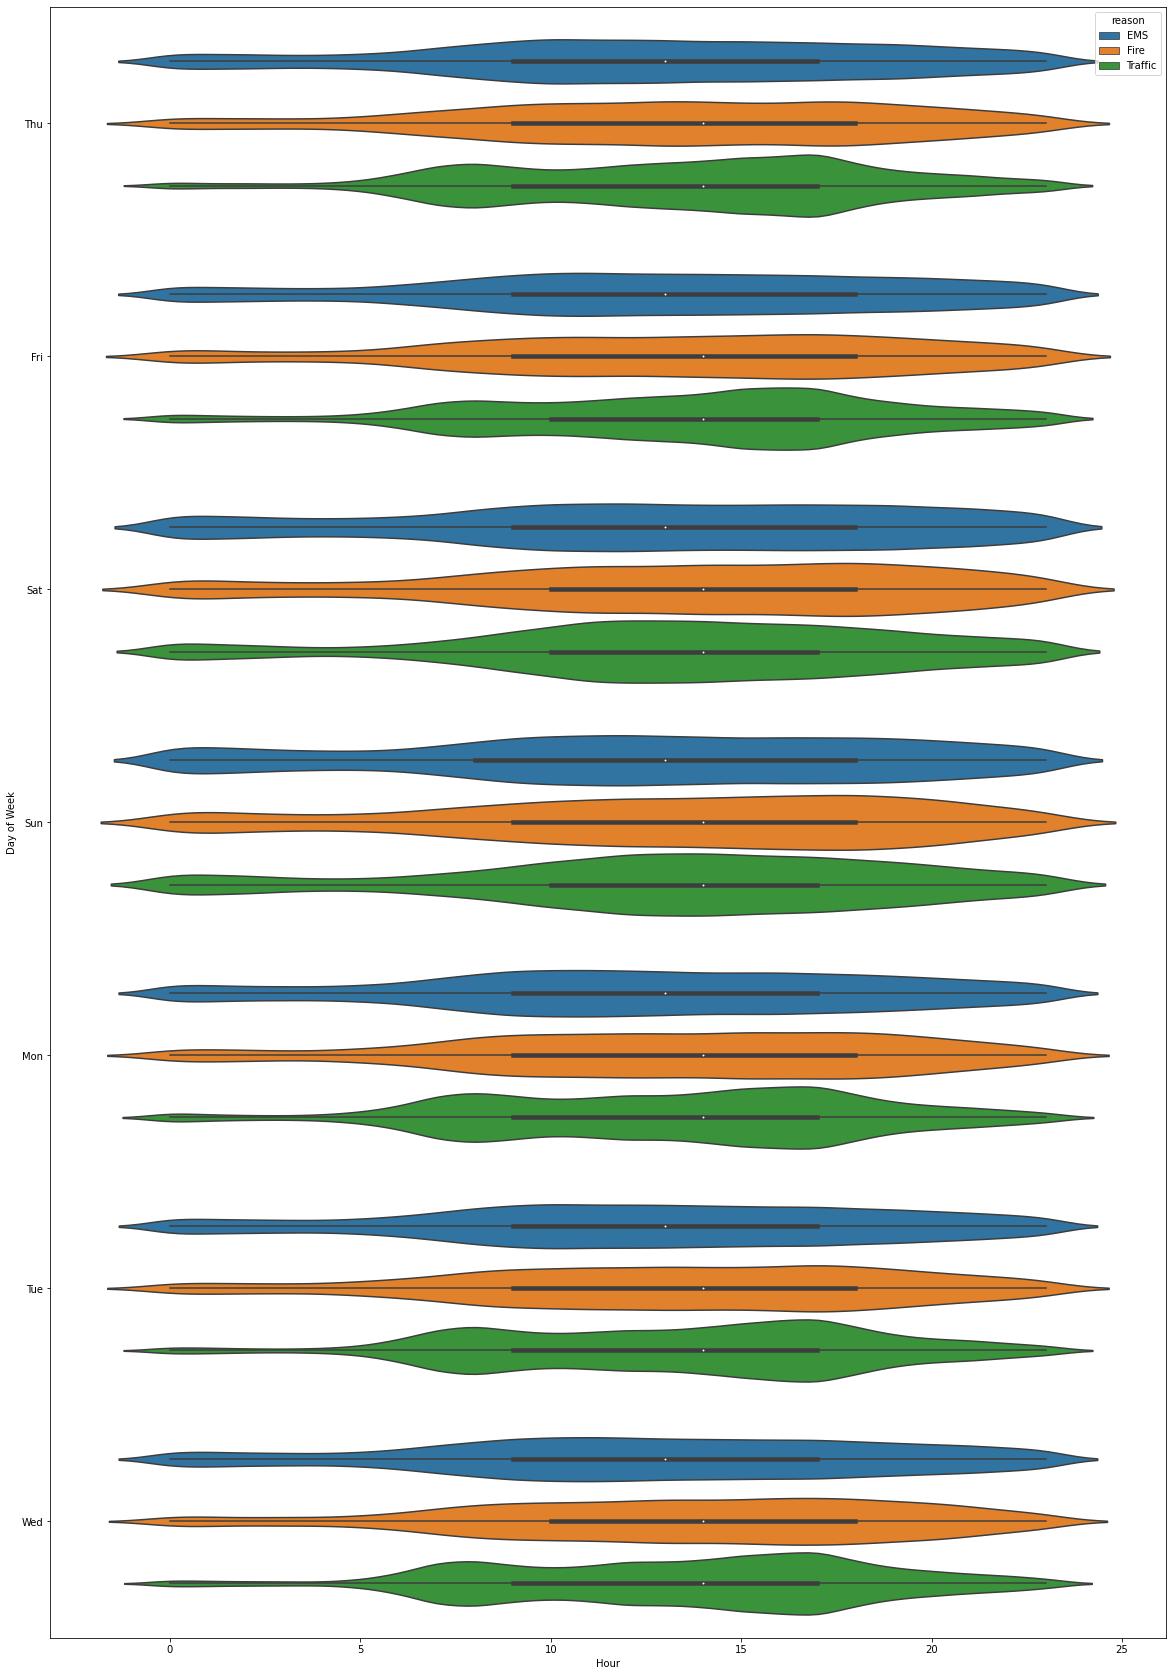

In [62]:
plt.figure(figsize=(20,30))
sns.violinplot(x='Hour', y='Day of Week',hue='reason', data=df)

> This plot shows that in general there are less calls during the nighttime (0-5h). 

**With a clustermap we can take a more precise look when the number of calls occur the most**

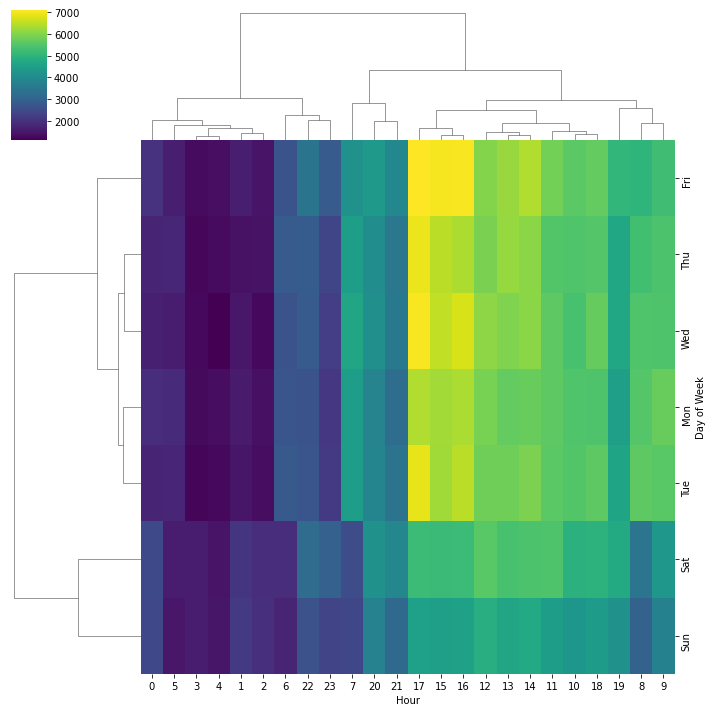

In [52]:
sns.clustermap(dayHour,cmap='viridis')

**Now using months as columns**

In [64]:
dayMonth = df.groupby(by=['Day of Week','Month']).count()['reason'].unstack()
dayMonth.head()

Month,1,2,3,4,5,6,7,8,9,10,11,12
Day of Week,,,,,,,,,,,,
Fri,9309,8255,10941,7997,8904,9207,8681,7336,7694,6934,8379,9305
Mon,8896,8747,8060,8410,7881,8511,9499,6854,6598,8075,6722,8492
Sat,8475,7593,8050,7514,7223,8198,7748,6111,6566,6609,6773,8592
Sun,7478,6452,6766,6865,6694,6837,7859,5275,5956,6316,5196,7165
Thu,9055,7997,8849,7722,8740,9489,8378,7508,6954,7482,8358,8151


<AxesSubplot:xlabel='Month', ylabel='Day of Week'>

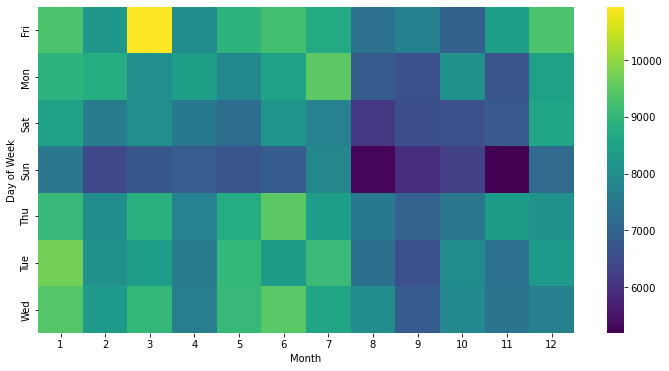

In [66]:
plt.figure(figsize=(12,6))
sns.heatmap(dayMonth,cmap='viridis')

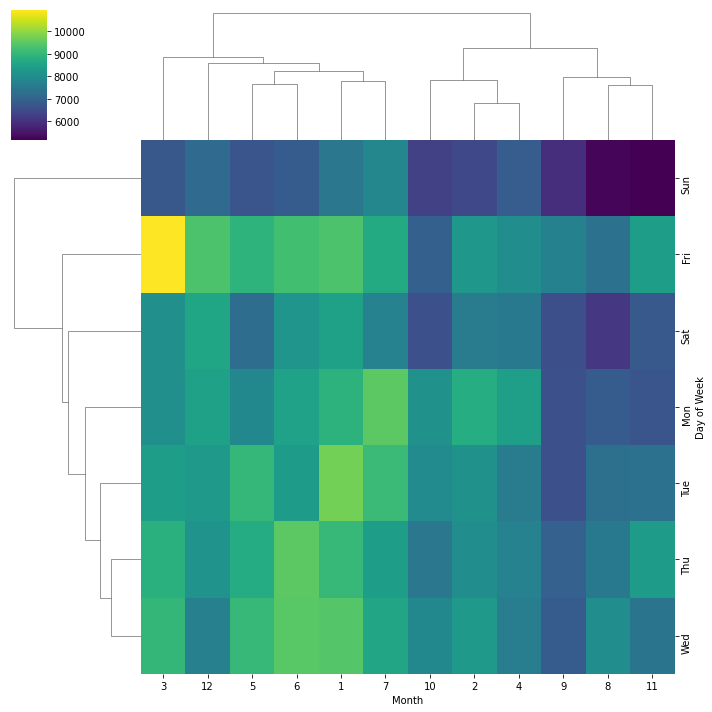

In [67]:
sns.clustermap(dayMonth,cmap='viridis')